In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_openml

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
np.asarray(y_train,np.int)
np.asarray(y_test,np.int)

array([7, 2, 1, ..., 4, 5, 6])

In [9]:
print('shape of training data',x_train.shape)
print('shape of training label',y_train.shape)
print('shape of testing data',x_test.shape)
print('shape of testing label',y_test.shape)

shape of training data (60000, 28, 28)
shape of training label (60000,)
shape of testing data (10000, 28, 28)
shape of testing label (10000,)


In [5]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [6]:
x_test=tf.keras.utils.normalize(x_test, axis=1)
x_train=tf.keras.utils.normalize(x_train, axis=1)

9


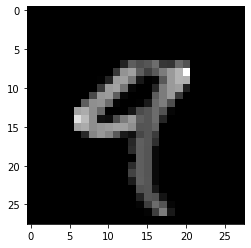

In [14]:
print(y_train[4])
plt.imshow(x_train[4],cmap='gray')

In [15]:
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#model.add(tf.keras.layers.Dense(units=556, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [17]:
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # 2eme lazem nimporter From keras.optimizers import Adam
    #model.compile(Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.optimizer.lr=0.001
#model.optimizer.lr

In [18]:
#model.fit(x_train,y_train,validation_split=0.20,epochs=5,shuffle=True)

In [19]:
#loss,accuracy=model.evaluate(x_test,y_test)

In [20]:
#prediction=model.predict(x_test)
#print(loss)
#print(accuracy)
#prediction[0]

In [16]:
pred=model.predict(x_test)
print(y_test[2])
print('la prediction de nombre est : ',np.argmax(pred[2]))

1
la prediction de nombre est :  1


In [20]:
#x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [22]:
#y.astype(int)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int32

In [23]:
#y.shape

(70000,)

In [3]:
img = cv.imread('Part I\T_v120849.b70.s1.jpg')

In [4]:
cv.imshow('img',img)
cv.waitKey(0)

-1

In [5]:
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [6]:
cv.imshow('gray_img',gray_img)
cv.waitKey(0)

-1

In [7]:
median=cv.medianBlur(gray_img,5)

In [8]:
cv.imshow('median',median)
cv.waitKey(0)

-1

In [9]:
resized=cv.resize(median,(median.shape[1]*4,median.shape[0]*4),interpolation=cv.INTER_LINEAR)

In [10]:
cv.imshow('median',resized)
cv.waitKey(0)

-1

In [11]:
ret,bw = cv.threshold(resized,150,255,cv.THRESH_BINARY_INV)

In [12]:
cv.imshow('binary',bw)
cv.waitKey(0)

-1

In [13]:
contours, hierarchy = cv.findContours(bw, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [14]:
len(contours)

5

In [15]:
img_digit=[]
U=0
for cnt in contours:
    
    x,y,w,h=cv.boundingRect(cnt)
    
    if h>100:
        
        img_digit.append(bw)
        
        mask=np.zeros(bw.shape[:2], dtype=np.uint8)
        
        cv.fillPoly(mask,pts=[cnt],color=(255))
        
        img_digit[-1]=cv.bitwise_and(img_digit[-1],img_digit[-1],mask=mask)
        
        img_digit[-1]=img_digit[-1][y:y+h,x:x+w]
        
        img_digit[-1]=cv.resize(img_digit[-1],(50,50),interpolation=cv.INTER_LINEAR)
        #nmedolha img we position initial we position final we la couleur linarsmo biha bach tdirlna lkarowat hadok
        cv.rectangle(resized,(x,y),(x+w,y+h),(0,255,0),2)
        if U==0:
            G4=img_digit[-1]
        if U==1:
            G1=img_digit[-1]
        if U==2:
            G3=img_digit[-1]
        if U==3:
            G2=img_digit[-1]    
        cv.imshow('digit'+str(U),img_digit[-1])
        cv.waitKey(0)
        U=U+1

In [17]:
cv.imshow('img',resized)
cv.waitKey(0)

-1

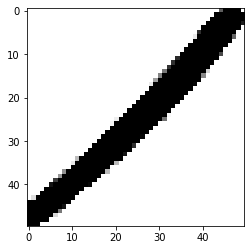

In [102]:
plt.imshow(G1,cmap=plt.cm.binary)

In [103]:
print(G1)

[[  0   0   0 ... 255 255   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


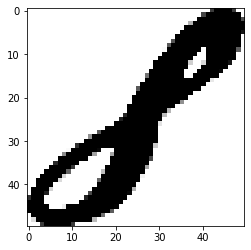

In [104]:
plt.imshow(G2,cmap=plt.cm.binary)

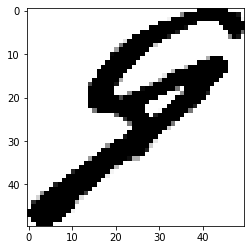

In [105]:
plt.imshow(G3,cmap=plt.cm.binary)

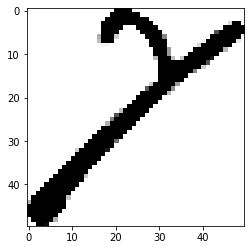

In [106]:
plt.imshow(G4,cmap=plt.cm.binary)

In [108]:
x_test=x_test.reshape(len(x_test),784)
x_train=x_train.reshape(len(x_train),784)
print(x_test.shape)
print(x_train.shape)

(10000, 784)
(60000, 784)


In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
choice=input(print("\n0-> SDG'hinge' \n1-> SDG'log' \n2-> KNN"))
if(int(choice)>=0 and int(choice)<3):
        if(int(choice)==0):
            sgd0 = SGDClassifier(loss='hinge', random_state=42)
            sgd0.fit(X_train, y_train)
            cross_val_score(sgd0, X_train, y_train, cv=3, scoring='accuracy')
            score0 = sgd0.score(X_test, y_test)
            print(score0)
            y_pred0=sgd0.predict(X_test)
            classification_report0=classification_report(y_test,y_pred0)
            print(classification_report0)
            print(confusion_matrix(y_test,y_pred0))
        if(int(choice)==1):
            sgd1 = SGDClassifier(loss='log', random_state=42)
            sgd1.fit(X_train, y_train)
            cross_val_score(sgd1, X_train, y_train, cv=3, scoring='accuracy')
            score1 = sgd1.score(X_test, y_test)
            print(score1)
            y_pred1=sgd1.predict(X_test)
            classification_report1=classification_report(y_test,y_pred1)
            print(classification_report1)
            print(confusion_matrix(y_test,y_pred1))
        if(int(choice)==2):
            k_nn = KNeighborsClassifier(n_neighbors=3)
            k_nn.fit(x_train, y_train)
            cross_val_score(k_nn, x_train, y_train, cv=3, scoring='accuracy')
            score0 = k_nn.score(x_test, y_test)
            print(score0)
            y_pred2=k_nn.predict(x_test)
            classification_report2=classification_report(y_test,y_pred2)
            print(classification_report2)
            print(confusion_matrix(y_test,y_pred2))


0-> SDG'hinge' 
1-> SDG'log' 
2-> KNN


None 2


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.94      0.95      0.95      1010
           4       0.98      0.95      0.96       982
           5       0.98      0.92      0.95       892
           6       0.96      0.98      0.97       958
           7       0.95      0.95      0.95      1028
           8       0.95      0.93      0.94       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

[[ 973    1    0    0    0    1    4    0    0    1]
 [   0 1129    3    0    0    0    3    0    0    0]
 [  13    1  980    5    0    0    3   15   14    1]
 [   4    6    3  960    1    5    0    9   18    4]
 [   1    4    2    0  934   

In [86]:
print(y_pred2[152])
print(y_test[152])

9
9


In [111]:
dim=(28,28)

In [112]:
G1 = cv.resize(G1, dim , interpolation = cv.INTER_AREA)

In [113]:
G1=G1.reshape(1,784)

In [114]:
G1=G1/255

In [115]:
G1.shape

(1, 784)

In [116]:
y_pre=k_nn.predict(G1)

In [117]:
print(y_pre)

[1]


In [118]:
G2 = cv.resize(G2, dim , interpolation = cv.INTER_AREA)

In [119]:
G2=G2.reshape(1,784)

In [120]:
G2=G2/255

In [121]:
G2.shape

(1, 784)

In [122]:
y_pr=k_nn.predict(G2)

In [123]:
print(y_pr)

[8]


In [124]:
G3 = cv.resize(G3, dim , interpolation = cv.INTER_AREA)

In [125]:
G3=G3.reshape(1,784)

In [126]:
G3=G3/255

In [127]:
G3.shape

(1, 784)

In [128]:
y_prS=k_nn.predict(G3)

In [134]:
print(y_prS)

[1]


In [130]:
G4 = cv.resize(G4, dim , interpolation = cv.INTER_AREA)

In [131]:
G4=G4.reshape(1,784)

In [132]:
G4=G4/255

In [133]:
y_pr4=k_nn.predict(G4)

In [129]:
print(y_pr4)

[7]
